Imagine yourself on Titanic. You heard the news - the ship is sinking! Will you survive to tell the story?

# Background

According to [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic) the ship carried 2,224 passengers and crew. Titanic carried lifeboats for only 1,178 people. At 11:40 ship time she hit an iceberg. The disaster resulted in more than 1,500 lost lifes. During the evacuation "women and children first" policy was adopted.

# Getting our hands Tidy

![Tidy Data Science Process](./assets/tidy-process.png)

Let's see what our environment looks like:

In [24]:
version

               _                           
platform       x86_64-apple-darwin16.7.0   
arch           x86_64                      
os             darwin16.7.0                
system         x86_64, darwin16.7.0        
status                                     
major          3                           
minor          4.1                         
year           2017                        
month          06                          
day            30                          
svn rev        72865                       
language       R                           
version.string R version 3.4.1 (2017-06-30)
nickname       Single Candle               

## Importing the data

The training and test data is provided by [Kaggle](https://www.kaggle.com/c/titanic) in csv format. [Description](https://www.kaggle.com/c/titanic/data) of the variables is also available. Let's load it into R and have a peek.

In [25]:
library(tidyverse)
library(forcats) # factors munging
library(stringr) # string manipulation
library(ggthemes) # visualization
library(scales) # visualization

In [26]:
train <- read_csv("data/train.csv")

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


891 rows and 12 columns in our training set. But who the passengers really are? Let's delve a bit deeper...

## Iteration I

### Visualize (skip transform)

In [27]:
glimpse(train)

Observations: 891
Variables: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0...
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3...
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley ...
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "...
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 1...
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1...
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0...
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", ...
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.86...
$ Cabin       <chr> NA, "C85", NA, "C123", NA, NA, "E46", NA, NA, NA, "G6",...
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", ...


In [28]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [29]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

#### Survival rate

In [30]:
summarise(train, SurvivalRate = sum(Survived) / nrow(train))

SurvivalRate
0.3838384


### Model

Our first model is pretty simple - we predict that everyone perish:

In [31]:
test <- read_csv("data/test.csv")
model <- data.frame(PassengerID = test$PassengerId, Survived = 0)
write_csv(model, "models/baseline.csv")

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


## Iteration II

### How much gender affects survival rate?

#### Transform

Change survived to *yes* and *no*:

In [32]:
titanic <- train %>%
                mutate(Survived = factor(Survived)) %>%
                mutate(Survived = fct_recode(Survived, "No" = "0", "Yes" = "1"))

Normalize the sex column:

In [33]:
titanic <- titanic %>%
        mutate(Sex = factor(Sex)) %>%
        mutate(Sex = fct_recode(Sex, "Female" = "female", "Male" = "male"))

#### Visualize

In [34]:
options(repr.plot.width=7, repr.plot.height=5)

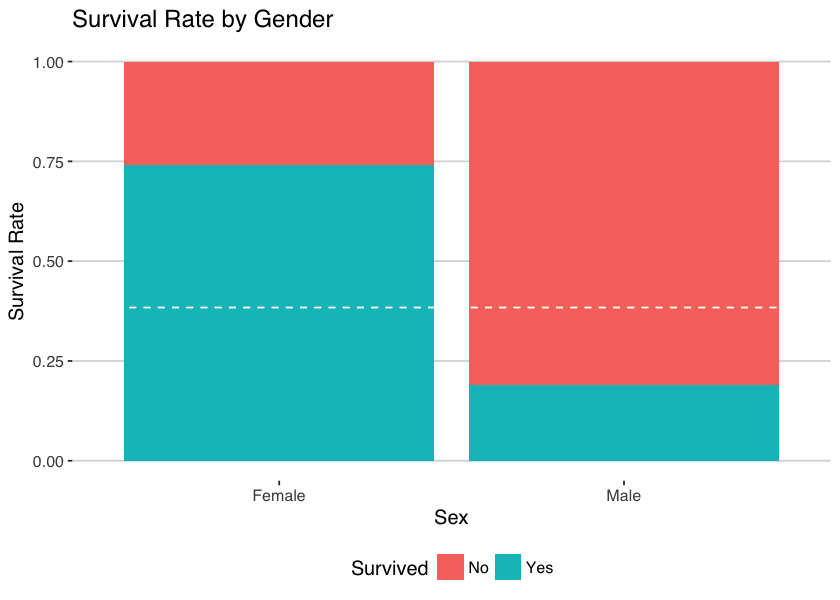

In [35]:
ggplot(titanic, aes(Sex, fill=Survived)) +
            geom_bar(position = "fill") +
            ylab("Survival Rate") +
            geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) +
            ggtitle("Survival Rate by Gender") +
            theme_hc() +
            scale_colour_hc()

#### Model

Our second model is simple, still. We predict that all (and only) women survive.

In [65]:
test <- read_csv("data/test.csv")
model <- data.frame(PassengerID = test$PassengerId, Survived = ifelse(test$Sex == 'female', 1, 0))
write_csv(model, "models/females_survive.csv")

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


### What social status does passangers have?

#### Transform

Let's try to extract person titles and try to group them based on that

In [60]:
titanic <- titanic %>%
    mutate(Title = str_sub(Name, str_locate(Name, ",")[ , 1] + 2, str_locate(Name, "\\.")[ , 1] - 1))

#### Visualization

In [48]:
titanic %>% group_by(Title) %>%
              summarise(count = n()) %>%
              arrange(desc(count))

Title,count
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Major,2
Mlle,2
Capt,1


### Are mothers more likely to survive?

#### Transform

In [38]:
titanic <- titanic %>% 
    mutate(Mother = factor(
        ifelse(
            c(
                titanic$Title == "Mrs" | 
                titanic$Title == "Mme" | 
                titanic$Title == "the Countess" | 
                titanic$Title == "Dona" | 
                titanic$Title == "Lady"
            ) & titanic$Parch > 0, 
            "Yes", "No"
            )
        )
    )

#### Visualization

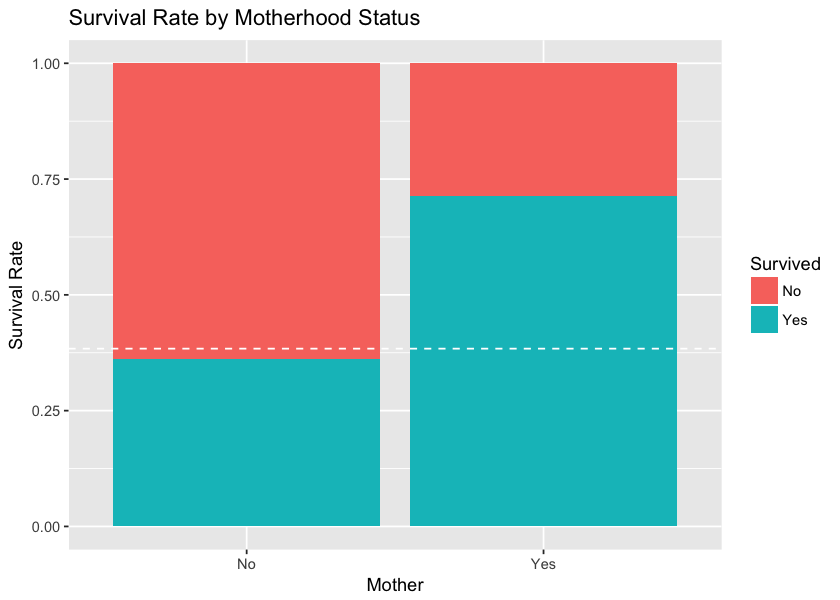

In [39]:
ggplot(titanic, aes(x = Mother, fill = Survived)) +
          geom_bar(position = "fill") +
          ylab("Survival Rate") +
          geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) +
          ggtitle("Survival Rate by Motherhood Status")

## Does social status influence the chance of survival?

#### Transform

In [61]:
titanic <- titanic %>%
    mutate(Title = factor(Title)) %>%
    mutate(Title = fct_collapse(Title, 
                                "Miss" = c("Miss", "Ms"), 
                                "Mrs" = "Mme", 
                                "Ranked" = c( "Major", "Dr", "Capt", "Col", "Rev"),
                                "Royalty" = c("Lady", "the Countess", "Don", "Sir", "Jonkheer"))) 

#### Visualize

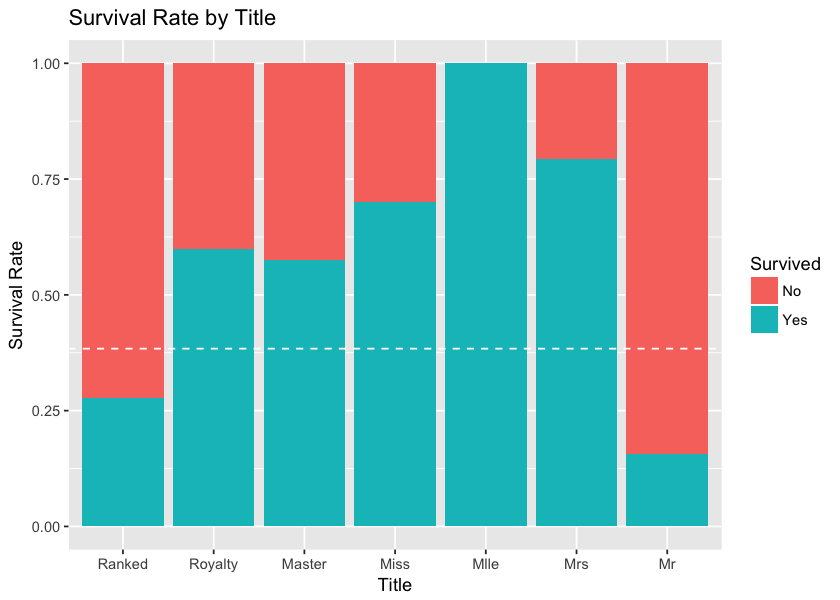

In [62]:
ggplot(titanic[1:891,], aes(x = Title, fill = Survived)) +
          geom_bar(position = "fill") +
          ylab("Survival Rate") +
          geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) +
          ggtitle("Survival Rate by Title")